---
# **Project** : **Cloths Image Classfication using Tensorflow and Keras**
---
### ---> **Sahil Kumar 777**

This project trains a neural network model to classify images of clothing.

* **Objective :-**  Train a neural network model to classify cloths images
* **Modules :-** Tensorflow, Keras, Numpy, Matplotlib


## Install Important Libraries

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


## Dataset
This project uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Explore Dataset

In [3]:
print("Training Data Shape : ",train_images.shape)
print("Training labels Shape : ",train_labels.shape)

print("Testing Data Shape : ",test_images.shape)
print("Testing labels Shape : ",test_labels.shape)




Training Data Shape :  (60000, 28, 28)
Training labels Shape :  (60000,)
Testing Data Shape :  (10000, 28, 28)
Testing labels Shape :  (10000,)


There are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

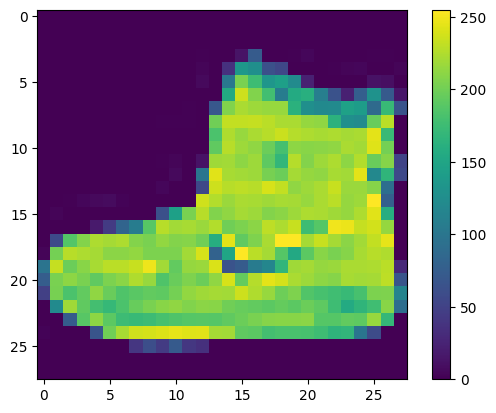

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

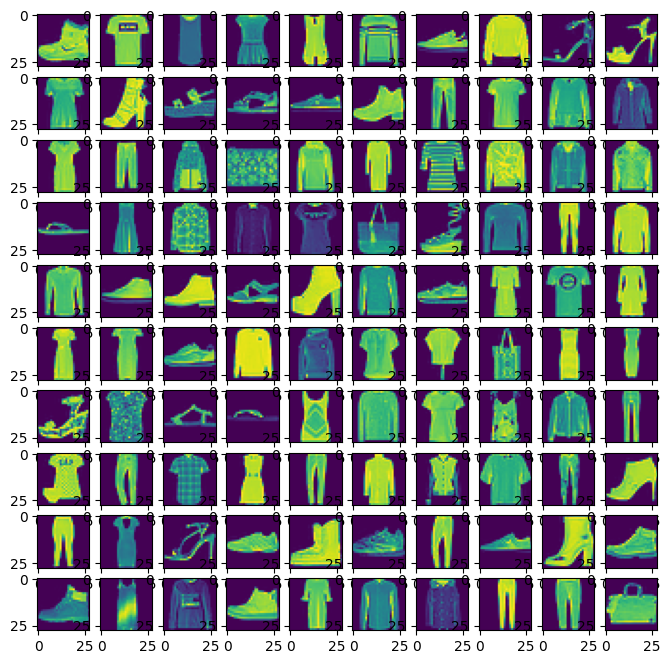

In [5]:
fig, axes = plt.subplots(10,10, figsize=(8,8))
for i,ax in enumerate(axes.flat):
  ax.imshow(train_images[i])

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

**Label	Class**
* 0	--  T-shirt/top
* 1 --	Trouser
* 2	--	Pullover
* 3	--	Dress
* 4	--	Coat
* 5	--	Sandal
* 6	--	Shirt
* 7	--	Sneaker
* 8	--	Bag
* 9	--	Ankle boot

In [7]:
# Scaling values to a range of 0 to 1

train_images = train_images / 255.0
test_images = test_images / 255.0

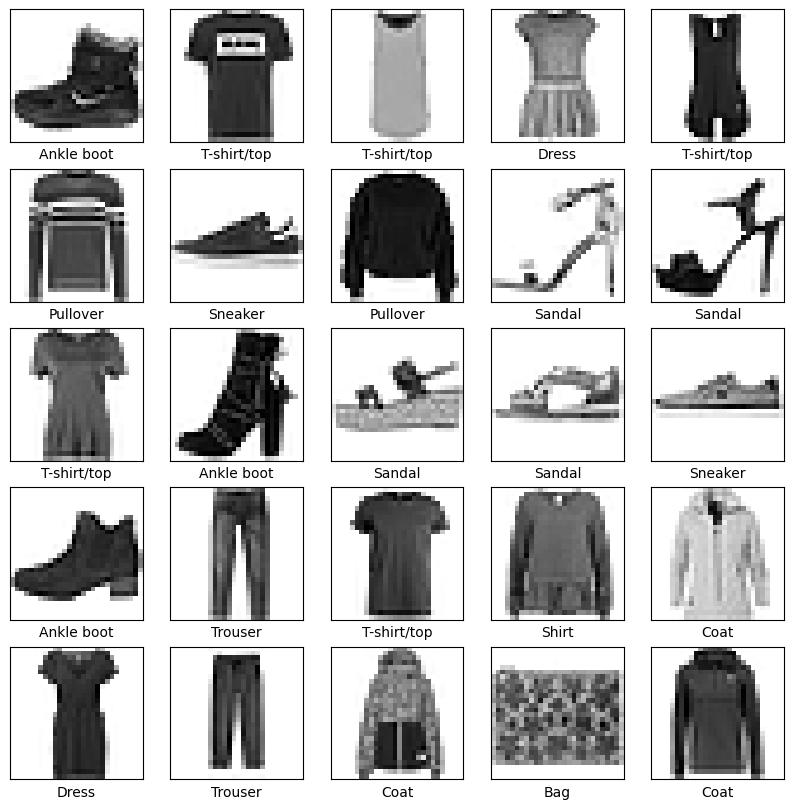

In [8]:
# Check the format is preserved
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build and train the Model

In [9]:
myModel = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
myModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
myModel.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics =['accuracy']
)

In [12]:
myModel.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7807 - loss: 0.6302
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8606 - loss: 0.3881
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8785 - loss: 0.3344
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8852 - loss: 0.3121
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8933 - loss: 0.2879
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8971 - loss: 0.2787
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8991 - loss: 0.2677
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9059 - loss: 0.2542
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9097 - loss: 0.2429
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9110 - loss: 0.2368


### Evaluate accuracy

In [13]:
test_loss, test_acc = myModel.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - 2ms/step - accuracy: 0.8790 - loss: 0.3505

Test accuracy: 0.8790000081062317


In [14]:
myModel.predict(train_images[:5])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([-15.056946 , -13.818015 , -17.688393 , -15.55831  , -12.733862 ,
         2.1998758, -17.161573 ,   5.192494 , -16.816713 ,  10.59736  ],
      dtype=float32)

In [15]:
outputModel = tf.keras.Sequential([
    myModel,
    tf.keras.layers.Softmax()
])

In [40]:
myModel.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

In [41]:
outputModel.layers

[<Sequential name=sequential, built=True>, <Softmax name=softmax, built=True>]

In [36]:
myModel.variables

[<Variable path=sequential/dense/kernel, shape=(784, 128), dtype=float32, value=[[ 0.03624314 -0.12891844 -0.11664508 ... -0.10414915 -0.02798049
   -0.06332731]
  [ 0.12033851  0.00892139  0.04966135 ...  0.05978859  0.04418146
   -0.1291272 ]
  [-0.09791549  0.01002493  0.04887851 ...  0.16821328  0.00606872
    0.13878965]
  ...
  [-0.10045694  0.06495341 -0.08831493 ...  0.41134363 -0.05138277
   -0.05367985]
  [ 0.21001376 -0.19600241 -0.21594691 ...  0.9115178   0.00997959
    0.20438352]
  [-0.07034575 -0.00154392 -0.12908542 ...  0.298411    0.01374255
   -0.15825711]]>,
 <Variable path=sequential/dense/bias, shape=(128,), dtype=float32, value=[ 0.2536323   0.73834324  0.40403494  0.24646519  0.56744635  0.05002787
   0.6289348   0.20878777  0.64825416 -0.01349866  0.20201698  0.6381282
   0.50521654  0.55904555  0.09369885 -0.02400535  0.16118304  0.42194664
  -0.0512762  -0.02062546  0.17324416  0.27616823  0.44181484  0.56087196
   0.4074586  -0.13982697  0.5580781   0.54887

## Classification

In [31]:
predictions = outputModel.predict(test_images[:15])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [17]:
i=2
predictions[i]

array([3.3753952e-01, 9.8017622e-03, 3.0561769e-03, 3.4083390e-01,
       2.0970709e-03, 6.2782901e-06, 3.0665106e-01, 2.7953995e-09,
       1.2395454e-05, 1.8562272e-06], dtype=float32)

In [18]:
pVal = np.argmax(predictions[i])

In [19]:
train_labels[i]

np.uint8(0)

In [20]:
class_names[pVal]

'Dress'

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

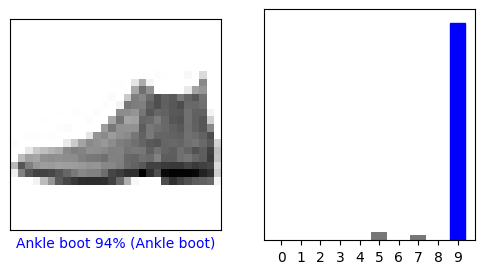

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

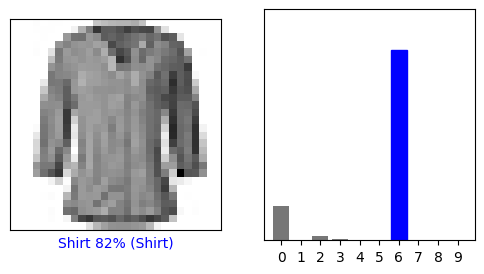

In [33]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

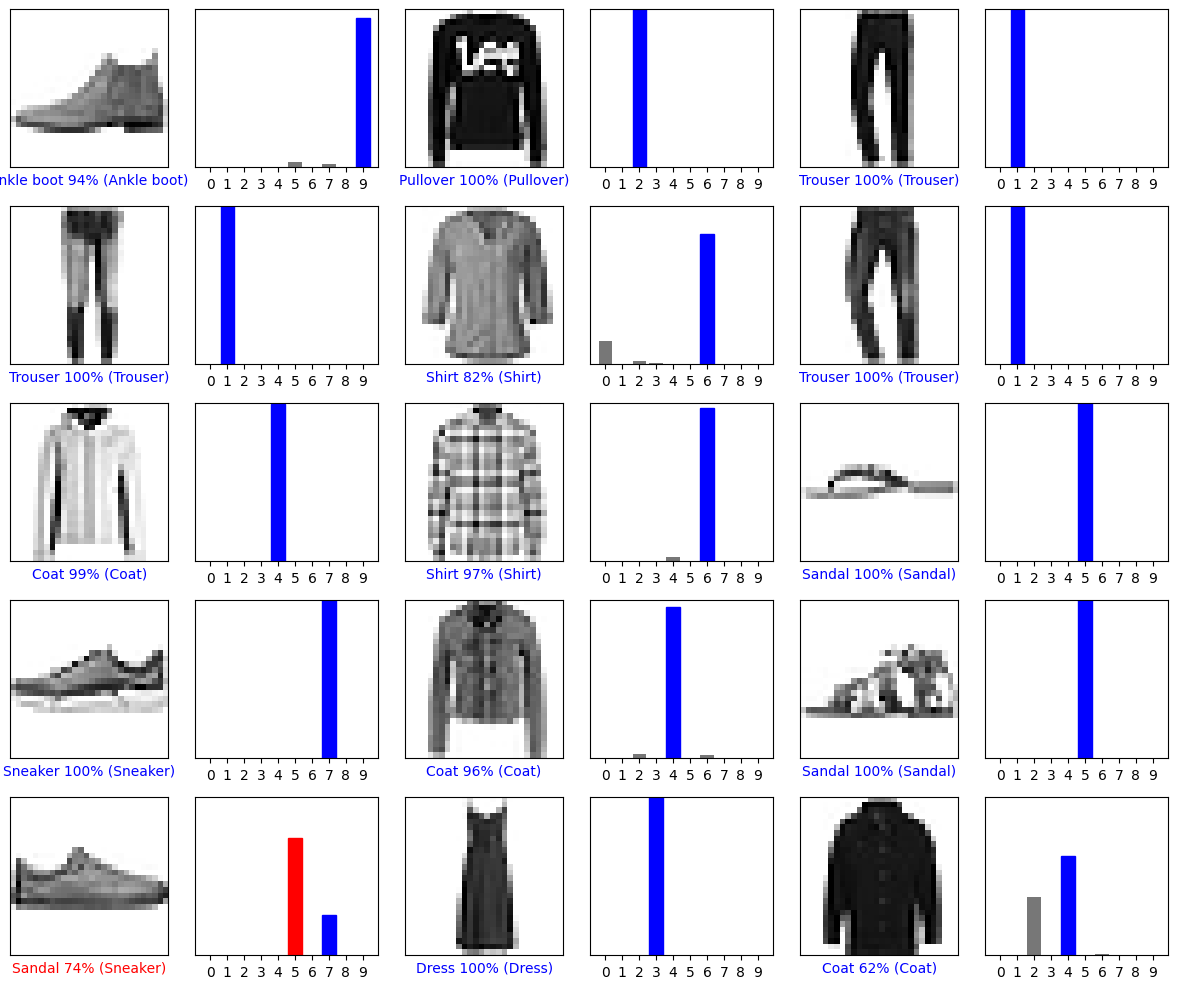

In [35]:
# Plot the first 15 test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()